![toy](assets/my-first/toy.jpg)

(image: flickr)

# My first machine learning model

In this workshop, we will walk through creating and training a simple machine learning model from scratch.

Through out the course, we'll be repeating the tasks in this process for different machine learning algorithms.

### Data Science Process

![workflow](assets/intro/ds.png)

(image: szilard)

### What we will cover today

1. Data transformation and cleaning
2. Feature selection
3. Model creation and training
4. Model validation
5. Undestanding results and iterating

### Data Source

Monthly Certificate of Entitlement (COE) Bidding Results Dataset over the past few years.

1. Download the dataset from https://data.gov.sg/dataset/coe-bidding-result
2. Extract the data and note down the path for use later

### Prediction Task

Predict the COE Premium (S$) based on Vehicle Class, Quota, Number of Received Bids, and Number of Successful Bids.

We'll be using Linear Regression.

### 1. Data Transformation and Cleaning

The first step is to inspect the data using Pandas.

The goal is to transform the data into features we will use for our model.

In [29]:
import pandas as pd

df = pd.read_csv('D:/tmp/coe-bidding-results/coe-results.csv')
df.describe()

,bidding_no,quota,bids_success,bids_received,premium
count,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1.497462,551.541117,542.492386,828.330964,46445.775635
std,0.500248,452.628678,450.746689,686.769488,26065.702205
min,1.000000,140.000000,126.000000,196.000000,852.000000
25%,1.000000,294.000000,285.000000,417.000000,31006.000000
50%,1.000000,373.000000,368.000000,549.000000,50502.000000
75%,2.000000,559.000000,547.000000,902.000000,65001.000000
max,2.000000,2272.000000,2246.000000,4545.000000,97889.000000


In [30]:
df.head()

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category D,373,365,509,889
4,2010-01,1,Category E,586,567,1011,19889


In [31]:
df.tail()

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
980,2018-03,1,Category A,1580,1572,2405,38830
981,2018-03,1,Category B,1390,1390,1731,39001
982,2018-03,1,Category C,247,202,446,36003
983,2018-03,1,Category D,528,525,885,8009
984,2018-03,1,Category E,571,525,967,39000


The data is monthly, from 2010 until 2018.

Let's inspect the other columns to see which ones we would like to use.

In [32]:
for column_name in df.columns:
    print('\nColumn:', column_name)
    print(df[column_name].describe())


Column: month
count         985
unique         99
top       2017-09
freq           10
Name: month, dtype: object

Column: bidding_no
count    985.000000
mean       1.497462
std        0.500248
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: bidding_no, dtype: float64

Column: vehicle_class
count            985
unique             5
top       Category D
freq             197
Name: vehicle_class, dtype: object

Column: quota
count     985.000000
mean      551.541117
std       452.628678
min       140.000000
25%       294.000000
50%       373.000000
75%       559.000000
max      2272.000000
Name: quota, dtype: float64

Column: bids_success
count     985.000000
mean      542.492386
std       450.746689
min       126.000000
25%       285.000000
50%       368.000000
75%       547.000000
max      2246.000000
Name: bids_success, dtype: float64

Column: bids_received
count     985.000000
mean      828.330964
std       686.769488
min      

From above, here's the transformation we need to do before we can use the data for training:

|Column|Transformation|Reason|
|--|--|--|
|vehicle_class|Convert to numerical representation|The words have no semantic meaning beyond a label|
|month|Consider dropping column from dataset|If the series is not time dependent, we do not need to include the month|
|All remaining input columns|Center the values and scale to within same range|To equalize the ranges and speed up training|

### Convert categorical data to numbers

For `vehicle_class` we'll try `pandas.get_dummies()` to convert the 5-category variable into 5 columns of indicator variables.

Using indicator variables instead of 1-5 will ensure that the categories are given equal weight when we start training.

In [33]:
df = pd.get_dummies(df, columns=['vehicle_class'], sparse=True, prefix=)
df

,month,bidding_no,quota,bids_success,bids_received,premium,vehicle_class_Category A,vehicle_class_Category B,vehicle_class_Category C,vehicle_class_Category D,vehicle_class_Category E
0,2010-01,1,1152,1145,1342,18502,1,0,0,0,0
1,2010-01,1,687,679,883,19190,0,1,0,0,0
2,2010-01,1,173,173,265,19001,0,0,1,0,0
3,2010-01,1,373,365,509,889,0,0,0,1,0
4,2010-01,1,586,567,1011,19889,0,0,0,0,1
5,2010-01,2,1151,1149,1673,20501,1,0,0,0,0
6,2010-01,2,717,717,1105,22400,0,1,0,0,0
7,2010-01,2,181,173,280,20090,0,0,1,0,0
8,2010-01,2,378,378,551,852,0,0,0,1,0
9,2010-01,2,588,579,1322,21899,0,0,0,0,1


### Determining time dependence

A quick test to determine if the premium is time dependent is to use an auto-correlation plot.

This will be covered in more detail in the Time Series module. For now, all you need to know is that correlation determines how closely related a given value at time `t` is with values at `t-lag`.

An auto-correlation plot computes the correlation values at a range of time lags.

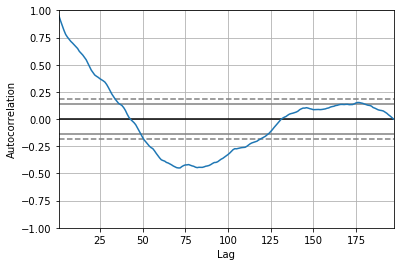

In [72]:
# get auto-correlation for COE premium
series = df.loc[df['vehicle_class_Category A']==1, 'premium'].values
pd.plotting.autocorrelation_plot(series)

The plot above shows that for lag values below 35, there's quite a strong correlation.

Since

We'll drop the month column for the linear regression model, and consider comparing the result later on with a simple model based on the previous values.

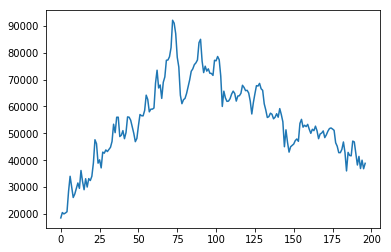

In [74]:
pd.Series(series).plot()

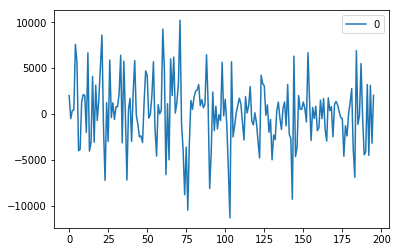

In [77]:
def difference(series):
    """Computes the difference of a series,
    which contains the relative change in value from
    the previous entry
    Args:
        series: the series
    Returns:
        the differenced values (change relative
        to the previous step)
    """
    values = series.values
    diff = [values[i] - values[i - 1]
            for i in range(1, len(values))]
    return pd.DataFrame(diff)

diff_df = difference(pd.Series(series))

diff_df.plot()

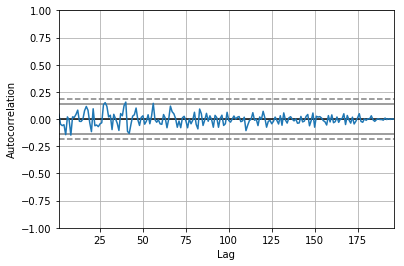

In [78]:
pd.plotting.autocorrelation_plot(diff_df)

In [ ]:
def inverse_difference(initial_value, differenced):
    """Computes the inverse difference of a series
    Args:
        initial_value: the initial value
        differenced: the differenced series as a
                     panda.DataFrame
    Returns:
        the original series as a panda.DataFrame
    """
    diff = differenced.values

    data = np.ndarray(differenced.shape[0] + 1)
    data[0] = initial_value

    for i in range(len(diff)):
        data[i+1] = data[i] + diff[i]
    return pd.DataFrame(data)

original_df = inverse_difference(series[0][0], diff_df)